In [1]:
cd ..

/home/forrest2/Workspace/github/fdesjardins/computational-physics


In [2]:
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib.patches import Arc
from matplotlib import animation, rc, patches, lines
from IPython.display import HTML
from lib.utils import *
from lib.mp_render import *

In [3]:
cd 01_mechanics

/home/forrest2/Workspace/github/fdesjardins/computational-physics/01_mechanics


## Angular Motion Variables

- angular displacement $ \Delta\theta = \theta_f - \theta_i $
- angular velocity $ w = \frac{\Delta\theta}{\Delta t} $
- angular acceleration $ \alpha = \frac{\Delta w}{\Delta t} $
- arc length $ S = R \Delta \theta $
- linear velocity $ v = r w $ where $ r w = \frac{R \Delta \theta}{\Delta t} = \frac{S}{\Delta t} $
- tangential acceleration $ a_t = \alpha r $

In [4]:
fps = 20

def update_animate_displacement(i):
    return np.deg2rad(45 + i * 5)

def animate_displacement(len_sec=5):
    fig, ax =  plt.subplots()
    fig.set_size_inches(4, 4)
    fig.set_dpi(180)
    
    def draw(res):
        return show_displacement(fig, ax, res)

    def update(i):
        ax.clear()
        ax.set_title('Angular Displacement')
        return 
        
    mp_render(fig, ax, update_animate_displacement, draw=draw, len_sec=len_sec, fps=fps, update=update)
    plt.close(fig)
    
    return HTML('<video width="500px" controls src="movie.mp4" />')

animate_displacement()

[0.000]: initializing figure...
[0.040]: running computations...
[0.065]: drawing frames...


Traceback (most recent call last):
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1536, in _init_draw
    artist.set_visible(False)
AttributeError: 'tuple' object has no attribute 'set_visible'


[1.957]: rendering final frames...
[7.468]: piping frames to ffmpeg...
[8.059]: closing pipe...
[8.168]: done


In [4]:
fps = 30

def update_animate_velocity(i):
    w = .5 * np.pi
    t_i = (i * (1000/fps) / 1000)
    return [t_i, np.rad2deg(w * t_i)]

def animate_velocity(len_sec=5):
    fig, ax =  plt.subplots()
    fig.set_size_inches(8, 8)
    fig.set_dpi(120)
    
    def draw_labels(t):
        t_label = f"$ t = {t:.2f}s $"
        w_label = f"$ \\vec{{w}} = 0.5 \\pi\ \\frac{{rad}}{{s}} $"
        return (
            ax.annotate(t_label, xy=(0.75, 0.9)),
            ax.annotate(w_label, xy=(0.75, 0.8))
        )
    
    def draw(res):
        t_i,d_i = res
        return (
            show_displacement(fig, ax, np.deg2rad(d_i)),
            draw_labels(t_i)
        )

    def update(i):
        ax.clear()
        ax.set_title('Angular Velocity')
        
    mp_render(fig, ax, update_animate_velocity, draw=draw, len_sec=len_sec, fps=fps, update=update)
    plt.close(fig)

animate_velocity(8)

[0.000]: initializing figure...
[0.050]: running computations...
[0.071]: drawing frames...


Traceback (most recent call last):
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1536, in _init_draw
    artist.set_visible(False)
AttributeError: 'tuple' object has no attribute 'set_visible'


[5.966]: rendering final frames...
[20.993]: piping frames to ffmpeg...
[23.336]: closing pipe...
[23.470]: done


<video width="600px" controls src="movie.mp4" />

In [ ]:
def animate_acceleration(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = .25 * np.pi
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = .1 * np.pi
    
    def draw_labels(ax, t, w, d, a):
        t_label = f"$ t = {t:.3f}s $"
        d_label = f"$ \\Delta\\theta = {d:.3f} rad $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        a_label = f"$ \\vec{{\\alpha}} = {a:.3f}\  \\frac{{rad}}{{s^2}} $"
        ax.annotate(t_label, xy=(0.8, 0.9))
        ax.annotate(w_label, xy=(0.8, 0.85))
        ax.annotate(a_label, xy=(0.8, 0.8))
    
    def init():
        ax.set_title('Angular Acceleration')
        draw_labels(ax, 0, w_0, d_0, a)
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):
        ax.clear()
        ax.set_title('Angular Acceleration')
        
        t = t_0 + (i * interval / 1000)
        w_i = w_0 + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        draw_labels(ax, t, w_i, d_i, a)
        return show_displacement(figure, ax, d_i)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_acceleration(6)

In [ ]:
def show_arc_length():
    def draw_labels(ax, d, radius, arc_length):
        S_label = f"$ S = R \\Delta\\theta = {arc_length:.3f}m $"        
        ax.annotate(S_label, xy=(0.75, 0.85))
    
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    radius = .4
    displacement = np.deg2rad(115)
    arc_length = radius * displacement
    
    draw_labels(ax, displacement, radius, arc_length)
    show_displacement(figure, ax, displacement, radius=radius)
    draw_displacement(ax, displacement, radius, (0.5, 0.5), show_head=True)
    
show_arc_length()
    

In [ ]:
def animate_linear_speed(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    radius = 0.3
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = .25 * np.pi
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = .1 * np.pi
    
    def draw_labels(ax, t, w, d, a, v, accel):
        t_label = f"$ t = {t:.3f}s $"
        d_label = f"$ \\Delta\\theta = {d:.3f} rad $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        a_label = f"$ \\vec{{\\alpha}} = {a:.3f}\  \\frac{{rad}}{{s^2}} $"
        v_label = f"$ v = R \\vec{{w}} = {v:.3f} m/s $"
        accel_label = f"$ a = R \\vec{{\\alpha}} = {accel:.3f} m/s^2 $"
        ax.annotate(t_label, xy=(0.75, 0.95))
        ax.annotate(w_label, xy=(0.75, 0.9))
        ax.annotate(a_label, xy=(0.75, 0.85))
        ax.annotate(v_label, xy=(0.75, 0.8))
        ax.annotate(accel_label, xy=(0.75, 0.75))
    
    def init():
        ax.set_title('Relating Motion Variables')
        draw_labels(ax, 0, w_0, d_0, a, 0, radius * a)
        return show_displacement(figure, ax, np.deg2rad(45))
    
    def animate(i):
        ax.clear()
        ax.set_title('Relating Motion Variables')
        
        # angular variables
        t = t_0 + (i * interval / 1000)
        w_i = w_0 + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        # linear variables
        speed = radius * w_i
        accel = radius * a
        
        draw_labels(ax, t, w_i, d_i, a, speed, accel)
        elements = show_displacement(figure, ax, d_i, radius=radius)
        draw_displacement(ax, d_i, radius, (0.5, 0.5), show_head=True)
        return elements
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_linear_speed(6)

## Angular Kinematics Formulas

- $ w = w_0 + \alpha t $
- $ \theta = \theta_0 + w_0 t + \frac{1}{2}\alpha t^2 $
- $ w^2 = w_0^2 + 2 \alpha (\theta - \theta_0) $
- $ \theta - \theta_0 = \frac{1}{2}(w_0 + w) t $
- where:
    - $ \theta_0 $ is the initial angle
    - $ \theta $ is the final angle
    - $ t $ is the time interval
    - $ w_0 $ is the initial angular velocity
    - $ w $ is the final angular velocity
    - $ \alpha $ is angular acceleration

## Torque and Equilibrium

- $ {\rm T} = F d $

In [ ]:
def animate_acceleration(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 50
    
    t_0 = 0
    # displacement [rad]
    d_0 = 0
    # w (angular velocity, omega) [rad/sec]
    w_0 = 0
    # a (angular acceleration, alpha) [rad/sec/sec]
    a = 0
    
    rect_origin = (0.5, 0.5)
    rect_height = 1e-10
    rect_length = 0.5
    rect_mass = 0
    
    particle_mass = 10
    
    # in meters
    torque_length = rect_length
    # in N
    torque_force = 2.5 / 9 * np.pi
    # torque in N•m
    torque = torque_length * torque_force
    
    def draw_labels(ax, t, torque, w):
        t_label = f"$ t = {t:.3f}s $"
        T_label = f"$ {{\\rm T}} = {torque:.3f} N•m $"
        w_label = f"$ \\vec{{w}} = {w:.3f}\  \\frac{{rad}}{{s}} $"
        ax.annotate(t_label, xy=(0.8, 0.95))
        ax.annotate(T_label, xy=(0.8, 0.9))
        ax.annotate(w_label, xy=(0.8, 0.85))
    
    def draw_torque(ax, origin, width, angle, torque):
        x,y = origin
        # the location the torque is being applied on the rect
        torque_x = x + np.sin(np.deg2rad(angle + 90)) * width
        torque_y = y - np.cos(np.deg2rad(angle + 90)) * width
        
        arrow_x = torque_x + np.sin(np.deg2rad(angle)) * 0.1
        arrow_y = torque_y - np.cos(np.deg2rad(angle)) * 0.1
        arrow_dx = -np.sin(np.deg2rad(angle)) * (0.1 - 0.015)
        arrow_dy = np.cos(np.deg2rad(angle)) * (0.1 - 0.015)
        
        return draw_labeled_arrow(ax, (arrow_x, arrow_y), (arrow_dx, arrow_dy), label_format=f"{torque:.3f} N")
    
    def init():
        ax.set_title('Torque')
        draw_labels(ax, 0, torque, w_0)
        draw_rect(ax, rect_origin, width=rect_length, height=rect_height, 
                  angle=0, arrow_length=torque_length)
        return draw_torque(ax, rect_origin, torque_length, 0, torque_force)
    
    def animate(i):
        ax.clear()
        ax.set_title('Torque')
        
        t = t_0 + (i * interval / 1000)
        
        I = particle_mass * pow(rect_length, 2)
        angular_accel = torque / I
        
        w_i = w_0 + angular_accel * t + a * t
        d_i = np.deg2rad(0 + np.rad2deg(w_i * t))
        
        particle_x = rect_origin[0] + np.sin(np.deg2rad(np.rad2deg(d_i) + 90)) * rect_length
        particle_y = rect_origin[1] - np.cos(np.deg2rad(np.rad2deg(d_i) + 90)) * rect_length
        draw_particle(ax, (particle_x, particle_y), 0.025)
        
        draw_labels(ax, t, torque, w_i)
        draw_rect(ax, rect_origin, width=rect_length, height=rect_height, 
                  angle=np.rad2deg(d_i), arrow_length=rect_length)
        
        draw_displacement(ax, d_i, rect_length, (0.5, 0.5), linestyle="dashed")
        
        return draw_torque(ax, rect_origin, rect_length, np.rad2deg(d_i), torque_force)
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_acceleration(6)

## Rotational Kinetic Energy

- $ K_{rot} = \frac{1}{2} I w^2 $

In [ ]:
def animate_gravity(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 25
    
    t_0 = 0
    g = 9.80665
    positions_0 = [
        (10, 18),
        (15, 13),
        (3, 17)
    ]
        
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Gravity')
        ax.grid(True)
        ax.set_ylabel('Height')
        ax.set_ylim(0, 20)
        ax.set_xlim(0, 20)
    
    def init():
        setup_axes(ax)
        return [draw_particle(ax, pos, 0.5) for pos in positions_0]
    
    def animate(i):
        setup_axes(ax)
        
        t = t_0 + (i * interval / 1000)
        positions = [(pos[0], pos[1] + -g * t**2) for pos in positions_0]
        
        return [draw_particle(ax, pos, 0.5) for pos in positions]
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_gravity(2)

## Pendulum Motion

- $ \vec{F}_{net} = m \vec{g} - k ( \vec{r} - R \hat{r}) $
- where:
  - $ g $ is the gravitational field vector
  - $ r $ is the vector from the pivot to the bob
  - $ R $ is the length of the connecting spring
  - $ k $ is the spring constant
- $ \vec{p}_2 = \vec{p}_1 + \vec{F}_{net} \Delta t $
- $ \vec{r}_2 = \vec{r}_1 + \frac{ \vec{p} }{m} \Delta t $

In [6]:
fps = 30

def animate_pendulum(len_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    figure.set_dpi(120)
    
    t_0 = 0
    dt = (1000/fps) / 1000
    g = np.array([0, -9.80665])
    m = 1
    k = 300
    R = .99314
    pivot_pos = np.array([0, 0.5 + R])
    pos_0 = np.array([R, 0.5 + R])
    p_0 = np.array([0, 0])
    particle_size = 0.1

    last_pos = pos_0
    last_p = p_0

    def update_animate_pendulum(i):
        nonlocal last_pos
        nonlocal last_p
        
        t_i = (i * (1000/fps) / 1000)

        r_vec = last_pos - pivot_pos
        r_hat = r_vec / (r_vec**2).sum()**0.5
        F_net = m * g - k * (r_vec - R * r_hat)
        p_i = last_p + F_net * dt
        pos_i = last_pos + (p_i/m) * dt
        
        last_p = p_i
        last_pos = pos_i

        theta = np.abs(np.math.atan2(np.linalg.det([r_vec, [0, -1]]), np.dot(r_vec, [0, -1])) + np.pi/2)
        arc_length = R * theta

        return [
            t_i,
            r_vec,
            r_hat,
            F_net,
            p_i,
            pos_i,
            theta,
            arc_length
        ]
    
    def draw_labels(ax, t, p, f_net, arc_length):
        t_label = f"$ t = {t:.3f}s $"
        p_label = f"$ \\vec{{p}} = [{p[0]:.2f},{p[1]:.2f}]\ kg⋅m/s $"
        f_label = f"$ \\vec{{F_{{net}}}} = [{f_net[0]:.2f},{f_net[1]:.2f}]\ kg⋅m/s^2 $"
        s_label = f"$ S = R \\Delta\\theta = {arc_length:.3f}m $"
        return (
            ax.annotate(t_label, xy=(0.4, 2.35)),
            ax.annotate(p_label, xy=(0.4, 2.2)),
            ax.annotate(f_label, xy=(0.4, 2.05)),
            ax.annotate(s_label, xy=(0.65, 0.35))
        )
        
    def update(i):
        ax.clear()
        ax.set_title('Pendulum')
        ax.grid(True)
        ax.set_ylabel('Height')
        ax.set_ylim(-1, 3)
        ax.set_xlim(-2, 2)
    
    def draw(res):
        t_i, r_vec, r_hat, F_net, p_i, pos_i, theta, arc_length = res
        return (
            draw_displacement(ax, 0, R, pivot_pos, theta1=np.rad2deg(-theta), linestyle="dashed"),
            draw_labeled_arrow(ax, pos_i, 0.5 * F_net, label_format=f"$ F_{{net}}\ [{F_net[0]:.3f},{F_net[1]:.3f}]\ kg⋅m/s^2 $", color="r"),
            draw_labeled_arrow(ax, pos_i, pivot_pos - pos_i, label_format=""),
            draw_labeled_arrow(ax, pos_i, -k * (r_vec - R * r_hat), color="g"),
            draw_labeled_arrow(ax, pos_i, m*g, color="b"),
            draw_labels(ax, t_i, p_i, F_net, arc_length),
            draw_particle(ax, pos_i, particle_size)
        )
        
    mp_render(figure, ax, update_animate_pendulum, draw=draw, len_sec=len_sec, fps=fps, update=update, pool_size=1)
    plt.close(figure)
    
animate_pendulum(10)

[0.000]: initializing figure...
[0.025]: running computations...
[0.041]: drawing frames...


Traceback (most recent call last):
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/home/forrest2/Workspace/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1536, in _init_draw
    artist.set_visible(False)
AttributeError: 'tuple' object has no attribute 'set_visible'


[4.343]: rendering final frames...
[38.756]: piping frames to ffmpeg...
[42.197]: closing pipe...
[42.405]: done


<video width="600px" controls src="movie.mp4" />

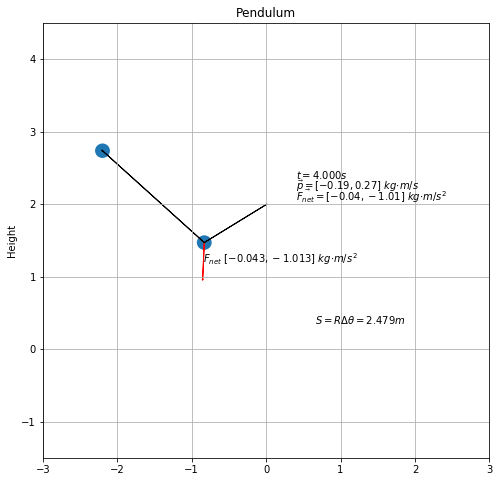

In [13]:
def animate_pendulum(duration_sec=5):
    figure, ax =  plt.subplots()
    figure.set_size_inches(8, 8)
    
    interval = 25
    
    t_0 = 0
    dt = interval / 1000
    g = np.array([0, -9.80665])
    m = 0.1
    k = 5
    R = .99314
    pivot_pos = np.array([0, 1 + R])
    pos_0 = np.array([R, 1 + R])
    p_0 = np.array([0, 0])
    particle_size = 0.1
    
    last_pos = pos_0
    last_p = p_0
    last_pos2 = np.array([R, R])
    last_p2 = np.array([0, 0])
    
    def draw_labels(ax, t, p, f_net, arc_length):
        t_label = f"$ t = {t:.3f}s $"
        p_label = f"$ \\vec{{p}} = [{p[0]:.2f},{p[1]:.2f}]\ kg⋅m/s $"
        f_label = f"$ \\vec{{F_{{net}}}} = [{f_net[0]:.2f},{f_net[1]:.2f}]\ kg⋅m/s^2 $"
        s_label = f"$ S = R \\Delta\\theta = {arc_length:.3f}m $"
        ax.annotate(t_label, xy=(0.4, 2.35))
        ax.annotate(p_label, xy=(0.4, 2.2))
        ax.annotate(f_label, xy=(0.4, 2.05))
        ax.annotate(s_label, xy=(0.65, 0.35))
        
    def setup_axes(ax):
        ax.clear()
        ax.set_title('Pendulum')
        ax.grid(True)
        ax.set_ylabel('Height')
        ax.set_ylim(-1.5, 4.5)
        ax.set_xlim(-3, 3)
    
    def init():
        setup_axes(ax)
        return [draw_particle(ax, pos_0, particle_size)]
    
    def animate(i):
        nonlocal last_pos
        nonlocal last_p
        nonlocal last_pos2
        nonlocal last_p2
        setup_axes(ax)
        
        t_i = t_0 + (i * interval / 1000)
        r_vec = last_pos - pivot_pos
        r_hat = r_vec / (r_vec**2).sum()**0.5
        F_net = m * g - k * (r_vec - R * r_hat)
        p_i = last_p + F_net * dt
        pos_i = last_pos + (p_i/m) * dt

        last_p = p_i
        last_pos = pos_i
        
        r_vec2 = last_pos2 - last_pos
        r_hat2 = r_vec2 / (r_vec2**2).sum()**0.5
        F_net2 = m * g - k * (r_vec2 - R * r_hat2)
        p_i2 = last_p2 + F_net2 * dt
        pos_i2 = last_pos2 + (p_i2/m) * dt

        last_p2 = p_i2
        last_pos2 = pos_i2
        
        theta = np.abs(np.math.atan2(np.linalg.det([r_vec, [0, -1]]), np.dot(r_vec, [0, -1])) + np.pi/2)
        arc_length = R * theta
        
#         draw_displacement(ax, 0, R, pivot_pos, theta1=np.rad2deg(-theta), linestyle="dashed")
        draw_labeled_arrow(ax, pos_i, 0.5 * F_net, label_format=f"$ F_{{net}}\ [{F_net[0]:.3f},{F_net[1]:.3f}]\ kg⋅m/s^2 $", color="r")
        draw_labeled_arrow(ax, pos_i, pivot_pos - last_pos, label_format="")
        draw_labeled_arrow(ax, pos_i, last_pos2 - last_pos, label_format="")
#         draw_labeled_arrow(ax, pos_i, -k * (r_vec - R * r_hat), color="g")
#         draw_labeled_arrow(ax, pos_i, m*g, color="b")
        draw_labels(ax, t_i, last_p, F_net, arc_length)
        
        return [
            draw_particle(ax, pos_i, particle_size),
            draw_particle(ax, pos_i2, particle_size),
        ]
        
    anim = animation.FuncAnimation(figure, animate, init_func=init,
                                   frames=duration_sec * (int)(1e3 / interval) + 1,
                                   interval=interval,
                                   blit=True)
    rc('animation', html='html5')
    HTML(anim.to_html5_video())
    return anim

animate_pendulum(4)